<a href="https://colab.research.google.com/github/rafaekas/BigData/blob/main/AQPC_simple_pond_data_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# upload file modin-0.28.0.tar.gz
from google.colab import files
uploaded = files.upload()
# upload file dataset
uploaded = files.upload()

Saving modin-0.28.0.tar.gz to modin-0.28.0.tar.gz


Saving IoTpond1.csv to IoTpond1.csv
Saving IoTPond2.csv to IoTPond2.csv
Saving IoTPond3.csv to IoTPond3.csv
Saving IoTPond4.csv to IoTPond4.csv
Saving IoTPond6.csv to IoTPond6.csv
Saving IoTPond7.csv to IoTPond7.csv
Saving IoTPond8.csv to IoTPond8.csv
Saving IoTPond9.csv to IoTPond9.csv
Saving IoTPond10.csv to IoTPond10.csv
Saving IoTPond11.csv to IoTPond11.csv
Saving IoTPond12.csv to IoTPond12.csv


In [4]:
# upgrade pandas
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 37.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.24.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [5]:
# instal paket modin dari file yang diunggah
!pip install -q ./modin-0.28.0.tar.gz --no-index

  Preparing metadata (setup.py) ... done


In [6]:
# konfigurasi modin untuk menggunakan engine dask
import modin.config as modin_cfg

modin_cfg.Engine.put("dask")

In [8]:
import os
import glob
import modin.pandas as pd

# direktori input
input_dir = "/content"

# Mencari semua file CSV dalam direktori "content"
ls_ponds = glob.glob(os.path.join(input_dir, "*.csv"))

# Menampilkan jumlah file yang ditemukan
print(f"found ponds: {len(ls_ponds)}")

# Membaca setiap file CSV menjadi dataframe dan menyimpannya dalam dictionary
df_ponds = {os.path.splitext(os.path.basename(p))[0]: pd.read_csv(p) for p in ls_ponds}

# Menampilkan daftar nama file (tanpa ekstensi) yang berhasil diimpor
print(f"ponds: {df_ponds.keys()}")

found ponds: 11


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:37279
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34475'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40749'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:40521', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40521
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:54810
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37703', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37703
INFO:distributed.core:Sta

ponds: dict_keys(['IoTPond4', 'IoTPond7', 'IoTPond12', 'IoTPond11', 'IoTpond1', 'IoTPond6', 'IoTPond10', 'IoTPond9', 'IoTPond8', 'IoTPond3', 'IoTPond2'])


<Axes: xlabel='pond'>

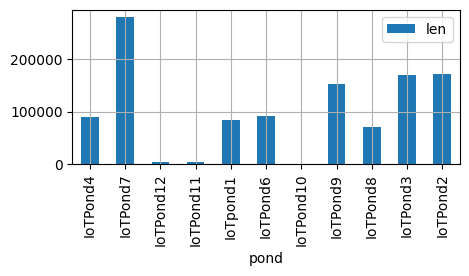

In [9]:
#  membuat DataFrame (berisi informasi panjang dari setiap DataFrame)
df_size = pd.DataFrame([{"pond": k, "len": len(df_ponds[k])} for k in df_ponds])
df_size.set_index("pond").plot.bar(figsize=(5, 2), grid=True)

In [10]:
from itertools import chain

# Mendapatkan semua kolom unik dari setiap DataFrame
cols = set(c for k in df_ponds for c in df_ponds[k].columns)
print(f"unique columns: {sorted(cols)}")
# Membuat versi singkat dari nama kolom
cols_short = set([c.lower().split("(")[0].rstrip() for c in cols])
print(f"short columns: {sorted(cols_short)}")

unique columns: ['AMMONIA', 'Ammonia (mg/L)', 'Ammonia(g/ml)', 'DATE', 'DISOLVED OXYGEN', 'Date', 'Dissolved Oxygen (g/ml)', 'Dissolved Oxygen (mg/L)', 'Dissolved Oxygen(g/ml)', 'Fish_Length (cm)', 'Fish_Length(cm)', 'Fish_Weight (g)', 'Fish_Weight(g)', 'Fish_length(cm)', 'Fish_weight(g)', 'Lenght', 'Length', 'NITRATE', 'Nitrate (mg/L)', 'Nitrate(g/ml)', 'PH', 'Population', 'TEMPERATURE', 'TURBIDITY', 'Temperature (C)', 'Temperature(C)', 'Total_length (cm)', 'Turbidity (NTU)', 'Turbidity(NTU)', 'Unnamed: 0', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Weight', 'Weight (g)', 'ammonia(g/ml)', 'created_at', 'entry_id', 'nitrate(g/ml)', 'pH', 'temperature(C)', 'turbidity (NTU)']
short columns: ['ammonia', 'created_at', 'date', 'disolved oxygen', 'dissolved oxygen', 'entry_id', 'fish_length', 'fish_weight', 'lenght', 'length', 'nitrate', 'ph', 'population', 'temperature', 'total_length', 'turbidity', 'unnamed: 0', 'unnamed: 11', 'unnamed: 12', 'unnamed: 13', 'weight']


In [11]:
# Mengganti nama kolom pertama DataFrame "IoTPond8" menjadi "created_at"
df_ponds["IoTPond8"].columns = ["created_at"] + list(df_ponds["IoTPond8"].columns)[1:]
print(df_ponds["IoTPond8"].columns)

Index(['created_at', 'Date', 'entry_id', 'Temperature (C)', 'Turbidity(NTU)',
       'Dissolved Oxygen (mg/L)', 'PH', 'Ammonia (mg/L)', 'Nitrate (mg/L)',
       'Total_length (cm)', 'Weight (g)', 'Unnamed: 11'],
      dtype='object')


In [12]:
from tqdm.auto import tqdm

# Menggunakan tqdm untuk menampilkan progress bar saat iterasi
ponds = list(df_ponds.keys())
for p in tqdm(ponds):
    # Mengubah nama kolom menjadi huruf kecil dan menghapus informasi tambahan
    df_ponds[p].columns = [c.lower().split("(")[0].rstrip() for c in df_ponds[p].columns]

    # Memeriksa keberadaan kolom "created_at"
    if "created_at" not in df_ponds[p].columns:
        print(f"table {p} has missing norm time column, see: {df_ponds[p].columns}")
        del df_ponds[p]
        continue

    # Mengubah kolom "created_at" menjadi tipe data datetime dengan zona waktu UTC
    df_ponds[p]["created_at"] = df_ponds[p]["created_at"].apply(pd.to_datetime, utc=True)

    # Menghapus baris dengan nilai yang hilang pada kolom "created_at"
    df_ponds[p] = df_ponds[p].dropna(subset=["created_at"])

    try:
        # Mengatur kolom "created_at" sebagai indeks DataFrame
        df_ponds[p].set_index("created_at", inplace=True)
    except Exception as ex:
        print(f"canot set datetime as index for {p}")
        del df_ponds[p]
    else:
        print(f"finished: {p}")
        display(df_ponds[p].head())


  0%|          | 0/11 [00:00<?, ?it/s]

finished: IoTPond4


,entry_id,temperature,turbidity,dissolved oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight
created_at,,,,,,,,,,
2021-06-19 00:00:22+00:00,1738,24.9375,81,7.945,8.51990,10.68908,688,75,6.94,3.07
2021-06-19 00:00:42+00:00,1739,25.0000,81,6.888,8.51990,11.21030,672,75,6.94,3.07
2021-06-19 00:01:02+00:00,1740,25.0000,81,33.728,8.51536,11.21030,671,75,6.94,3.07
2021-06-19 00:01:23+00:00,1741,24.9375,81,10.531,8.52444,10.68908,668,75,6.94,3.07
2021-06-19 00:02:48+00:00,1745,24.9375,81,11.740,8.52444,11.21030,683,75,6.94,3.07


finished: IoTPond7


,date,entry_id,temperature,turbidity,dissolved oxygen,ph,ammonia,nitrate,fish_length,fish_weight,unnamed: 11,unnamed: 12,unnamed: 13
created_at,,,,,,,,,,,,,
2021-06-18 13:02:10+00:00,18-06-21,1,25.3750,41,40.048,8.17490,780.03149,1218,6.772857,3.037143,NaN,NaN,NaN
2021-06-18 13:02:30+00:00,18-06-21,2,25.3750,41,40.048,8.13858,0.14989,1968,6.772857,3.037143,NaN,NaN,NaN
2021-06-18 13:02:50+00:00,18-06-21,3,25.3125,41,40.048,8.34740,0.24039,1879,6.772857,3.037143,NaN,NaN,NaN
2021-06-18 13:03:10+00:00,18-06-21,4,25.3125,41,40.048,8.17490,0.31723,1792,6.772857,3.037143,NaN,NaN,NaN
2021-06-18 13:03:40+00:00,18-06-21,5,25.3750,31,40.048,8.14766,1.02537,1934,6.772857,3.037143,NaN,NaN,NaN


finished: IoTPond12


,entry_id,temperature,turbidity,disolved oxygen,ph,ammonia,nitrate,population,length,weight
created_at,,,,,,,,,,
2021-06-25 15:14:09+00:00,1,27.0,100,0.000,6.05951,0.00013,90,50,14.64,28.6
2021-06-25 15:14:28+00:00,2,27.0,100,1.027,6.00049,0.00000,201,50,14.64,28.6
2021-06-25 15:14:53+00:00,3,27.0,100,0.000,6.07766,0.00001,112,50,14.64,28.6
2021-06-25 15:15:49+00:00,4,27.0,100,0.000,6.05043,0.00012,153,50,14.64,28.6
2021-06-25 15:18:36+00:00,5,27.0,100,0.000,6.06858,0.00027,272,50,14.64,28.6


finished: IoTPond11


,entry_id,temperature,turbidity,disolved oxygen,ph,ammonia,nitrate,population,lenght,weight
created_at,,,,,,,,,,
2021-06-25 15:14:07+00:00,1,27.0625,100,22.562,8.20213,12151.86328,1061,50,14.12,33.8
2021-06-25 15:14:26+00:00,2,27.1250,100,20.493,8.19759,15100.59473,1050,50,14.12,33.8
2021-06-25 15:15:42+00:00,3,27.1250,100,12.555,8.20213,42010.77344,1039,50,14.12,33.8
2021-06-25 15:16:01+00:00,4,27.0625,100,17.403,8.19759,21075.64453,1037,50,14.12,33.8
2021-06-25 15:16:21+00:00,5,27.1250,100,22.765,8.21121,62079.92578,1039,50,14.12,33.8


finished: IoTpond1


,entry_id,temperature,turbidity,dissolved oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight
created_at,,,,,,,,,,
2021-06-19 00:00:05+00:00,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
2021-06-19 00:01:02+00:00,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2021-06-19 00:01:22+00:00,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
2021-06-19 00:01:44+00:00,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
2021-06-19 00:02:07+00:00,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


finished: IoTPond6


,entry_id,temperature,turbidity,dissolved oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight
created_at,,,,,,,,,,
2021-06-19 00:01:46+00:00,1972,23.5000,30,0.723,9.02832,5.91560,285,75,7.3,3.2
2021-06-19 00:02:05+00:00,1973,23.5000,29,0.008,8.98746,5.80338,290,75,7.3,3.2
2021-06-19 00:05:01+00:00,1982,23.4375,29,1.365,9.04647,5.65000,302,75,7.3,3.2
2021-06-19 00:10:14+00:00,1998,23.4375,30,0.249,9.06009,5.54304,289,75,7.3,3.2
2021-06-19 00:35:35+00:00,2072,23.4375,30,1.892,9.11910,4.79604,297,75,7.3,3.2


finished: IoTPond10


,entry_id,temperature,turbidity,disolved oxygen,ph,ammonia,nitrate,population,length,weight
created_at,,,,,,,,,,
2021-06-25 15:48:59+00:00,1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
2021-06-25 15:49:19+00:00,2,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
2021-06-25 15:50:16+00:00,3,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6
2021-06-25 15:51:50+00:00,4,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6
2021-06-25 15:52:10+00:00,5,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6


finished: IoTPond9


,date,entry_id,temperature,turbidity,dissolved oxygen,ph,ammonia,nitrate,fish_length,fish_weight
created_at,,,,,,,,,,
2021-06-18 12:11:39+00:00,18-06-2021,1,27.7,97,7.329,8.48358,0.05393,0,6.947143,4.371429
2021-06-18 12:12:08+00:00,18-06-2021,2,27.7,97,7.659,8.40641,0.13203,0,6.947143,4.371429
2021-06-18 12:12:28+00:00,18-06-2021,3,27.7,96,11.230,8.41095,0.27792,0,6.947143,4.371429
2021-06-18 12:12:48+00:00,18-06-2021,4,27.0,45,9.828,8.40641,0.04398,813,6.947143,4.371429
2021-06-18 12:13:07+00:00,18-06-2021,5,27.0,45,9.623,8.40641,0.00052,1255,6.947143,4.371429


finished: IoTPond8


,date,entry_id,temperature,turbidity,dissolved oxygen,ph,ammonia,nitrate,total_length,weight,unnamed: 11
created_at,,,,,,,,,,,
2021-06-18 12:06:49+00:00,18-06-2021,1,25.0000,95,14.697,8.34286,0.02520,0,6.821429,2.869286,`
2021-06-18 12:07:10+00:00,18-06-2021,2,24.8750,16,13.440,8.34286,0.00002,3114,6.821429,2.869286,NaN
2021-06-18 12:07:52+00:00,18-06-2021,3,24.6875,-2,13.600,8.36101,0.00042,2454,6.821429,2.869286,NaN
2021-06-18 12:08:12+00:00,18-06-2021,4,24.6875,-2,13.872,8.37463,0.01150,1745,6.821429,2.869286,NaN
2021-06-18 12:08:31+00:00,18-06-2021,5,24.6875,-1,14.209,8.36101,0.03008,1459,6.821429,2.869286,NaN


finished: IoTPond3


,entry_id,temperature,turbidity,dissolved oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight
created_at,,,,,,,,,,
2021-06-19 00:00:04+00:00,1941,23.75,80,27.736,7.04911,5.15546,114,50,6.74,3.2
2021-06-19 00:00:26+00:00,1942,23.75,80,4.195,7.09450,4.53072,114,50,6.74,3.2
2021-06-19 00:02:03+00:00,1945,23.75,80,10.310,7.07635,5.21473,113,50,6.74,3.2
2021-06-19 00:02:26+00:00,1946,23.75,81,1.196,7.07181,5.41747,100,50,6.74,3.2
2021-06-19 00:03:31+00:00,1948,23.75,80,2.338,7.08996,5.45899,112,50,6.74,3.2


finished: IoTPond2


,entry_id,temperature,turbidity,dissolved oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight
created_at,,,,,,,,,,
2021-06-19 00:00:05+00:00,1889,24.8750,100,4.505,8.43365,0.38,193,50,6.96,3.36
2021-06-19 00:01:02+00:00,1890,24.9375,100,6.601,8.43818,0.38,194,50,6.96,3.36
2021-06-19 00:01:22+00:00,1891,24.8750,100,15.797,8.42457,0.38,192,50,6.96,3.36
2021-06-19 00:01:44+00:00,1892,24.9375,100,5.046,8.43365,0.38,193,50,6.96,3.36
2021-06-19 00:02:07+00:00,1893,24.9375,100,38.407,8.40641,0.38,192,50,6.96,3.36


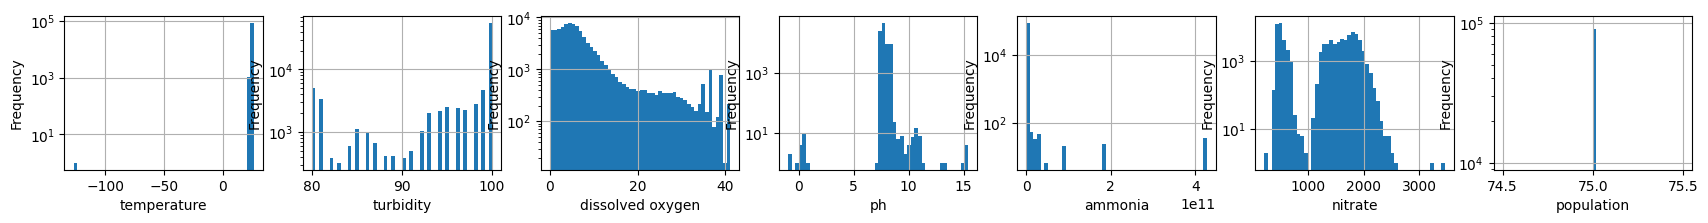

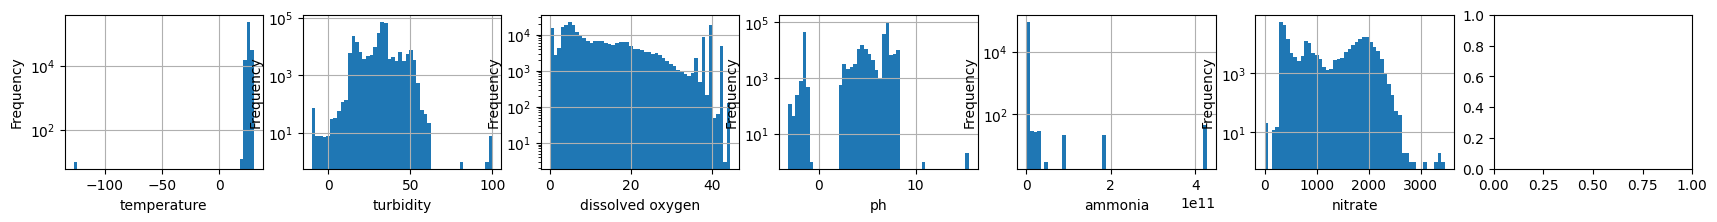

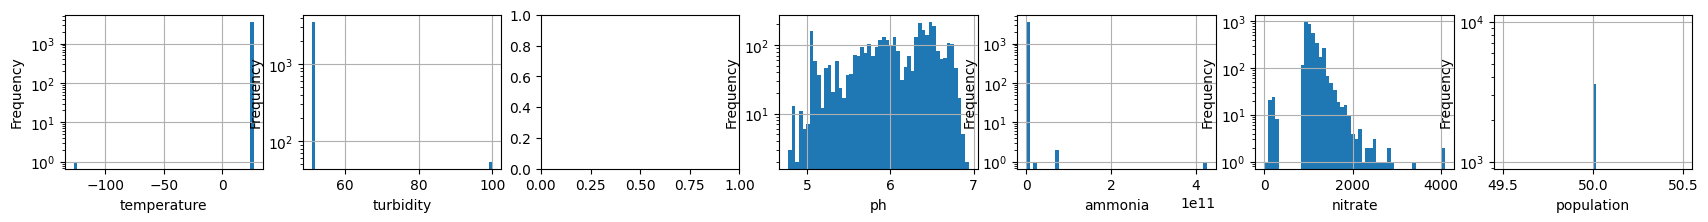

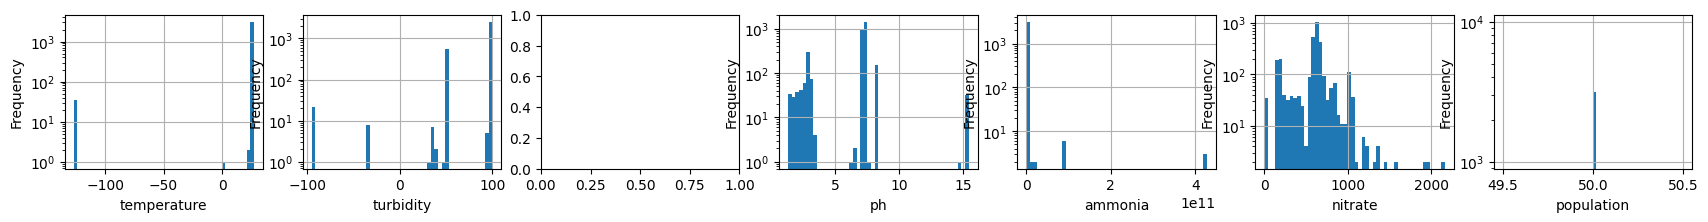

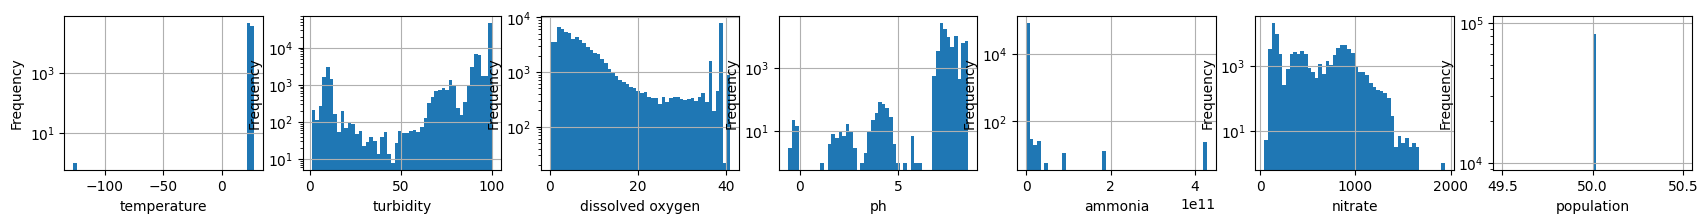

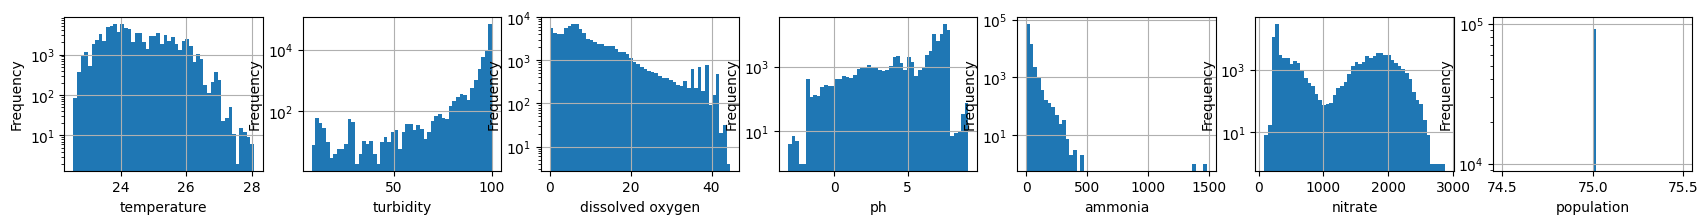

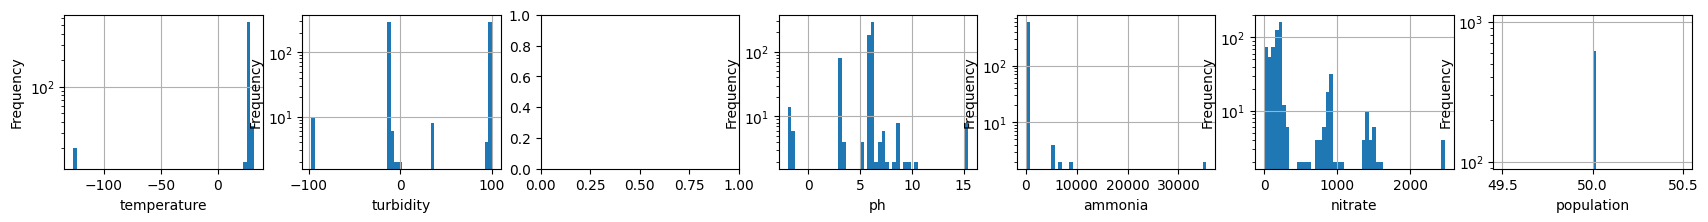

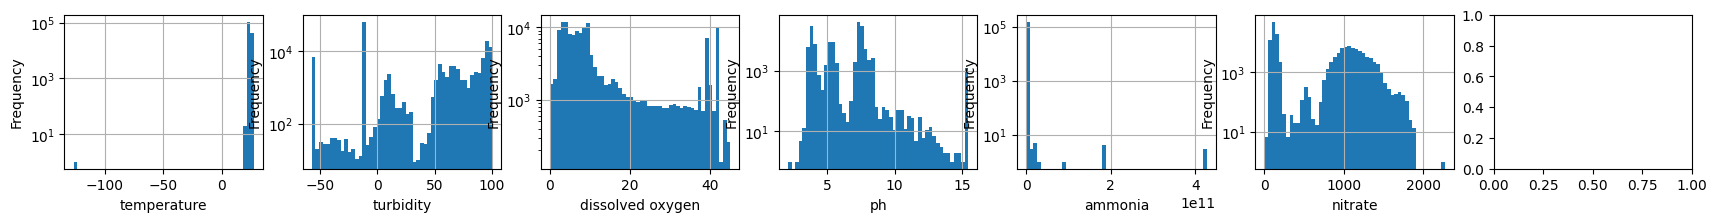

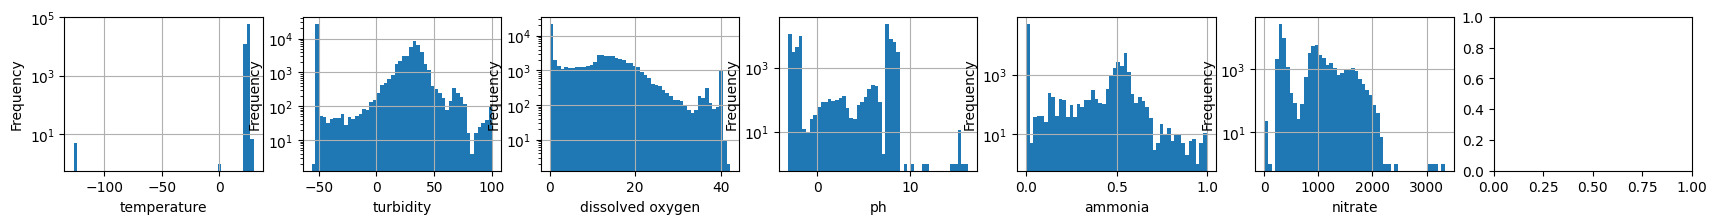

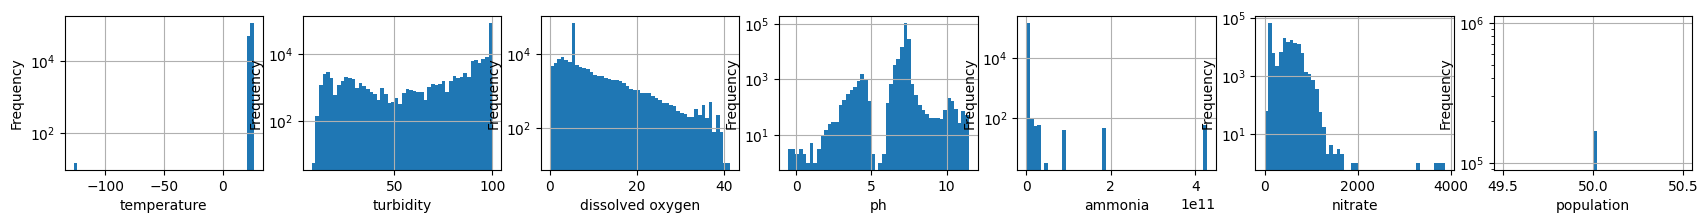

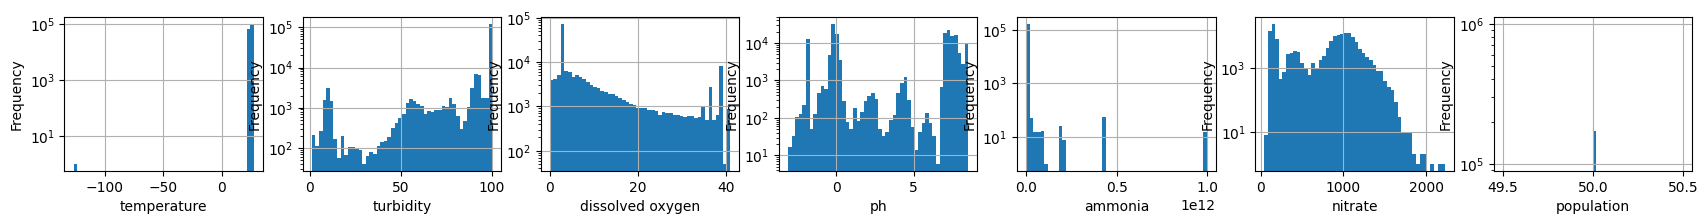

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Daftar kolom yang akan digunakan untuk membuat histogram
cols = ["temperature", "turbidity", "dissolved oxygen", "ph", "ammonia", "nitrate", "population"]

# Iterasi melalui setiap DataFrame dalam df_ponds
for p in df_ponds:
    # Mengganti nilai infinity dengan NaN agar dapat diproses dalam plotting
    df_ponds[p].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Membuat subplot untuk setiap kolom dalam cols
    fig, axarr = plt.subplots(ncols=len(cols), figsize=(len(cols) * 3, 2))

    # Iterasi melalui setiap kolom dalam cols
    for i, col in enumerate(cols):
        # Memeriksa apakah kolom ada dalam DataFrame
        if col not in df_ponds[p].columns:
            continue

        # Membuat histogram dengan skala logaritmik
        df_ponds[p][col].plot.hist(bins=50, ax=axarr[i], grid=True)
        axarr[i].set_xlabel(col)
        axarr[i].set_yscale('log')

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model klasifikasi (misalnya, Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi label target menggunakan model
y_pred = model.predict(X_test)

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

# Menampilkan lost performance
lost = 1 - accuracy
print(f"\nLost Performance: {lost}")

# Menampilkan classification result
print("\nClassification Result:")
for i in range(len(X_test)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0

Lost Performance: 0.0

Classification Result:
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 2, Actual: 